**A Guide for GALFITM**  
@Author: Ray  
@Time: 2022.09.04  
@Cite:  
1. 庄明阳在CSST暑期学校上的报告  
2. [GALFITM官网](https://www.nottingham.ac.uk/astronomy/megamorph/)
3. [GALFIT官网](https://users.obs.carnegiescience.edu/peng/work/galfit/galfit.html)

In [102]:
from astropy.io import fits
from astropy.visualization import simple_norm

import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

from pathlib import Path
import shutil

# 输入文件  
galfitm的输入文件包括4个图像和2个文本文件：  
* 4个图像
    1. 星系图像
    2. PSF图像
    3. mask图像
    4. sigma图像
* 2个文本文件
    1. 配置文件.feedme
    2. 限制文件.constraints

## 星系图像

---------- 星系图像的header里几个参数需要关注 ----------
g band --> GAIN: 1.020669 | EXPTIME: 688.0 | NCOMBINE: 1
r band --> GAIN: 1.037932 | EXPTIME: 1180.0 | NCOMBINE: 1
i band --> GAIN: 1.038073 | EXPTIME: 1260.0 | NCOMBINE: 1
z band --> GAIN: 1.093788 | EXPTIME: 630.0 | NCOMBINE: 1
y band --> GAIN: 1.056476 | EXPTIME: 640.0 | NCOMBINE: 1


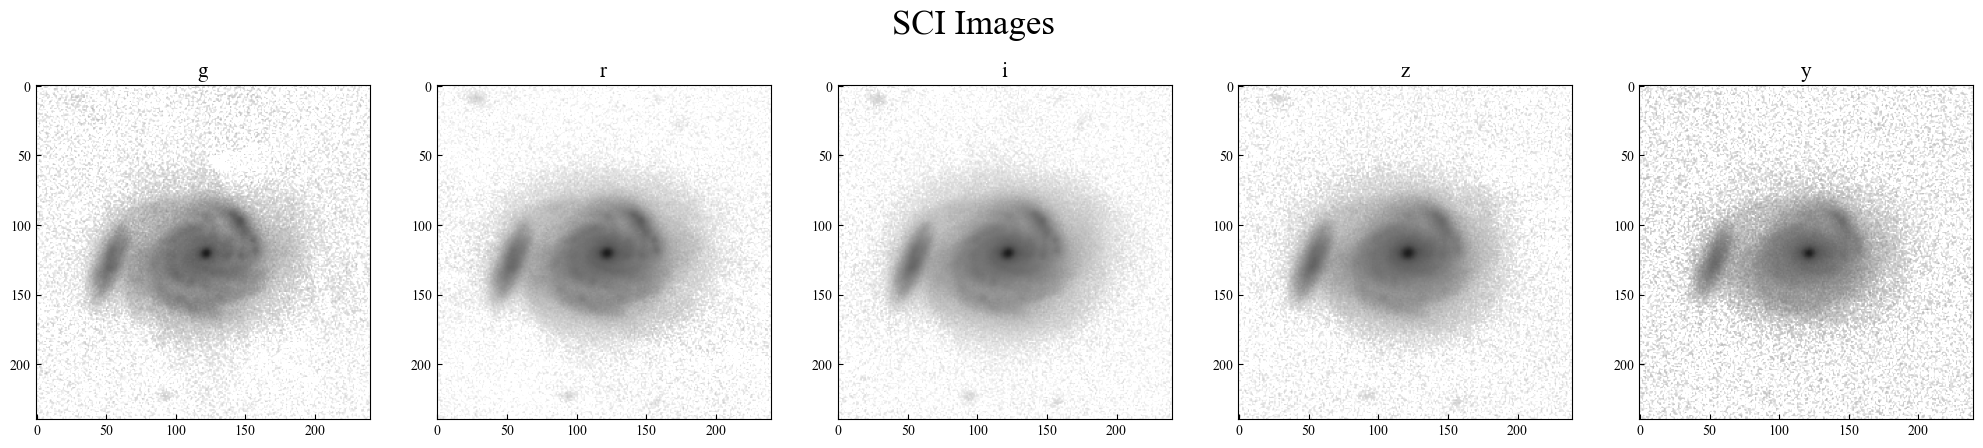

In [103]:
hdul_input_sci_g = fits.open(Path.cwd() / 'late_g_data.fits')
hdul_input_sci_r = fits.open(Path.cwd() / 'late_r_data.fits')
hdul_input_sci_i = fits.open(Path.cwd() / 'late_i_data.fits')
hdul_input_sci_z = fits.open(Path.cwd() / 'late_z_data.fits')
hdul_input_sci_y = fits.open(Path.cwd() / 'late_y_data.fits')

print("-"*10 + " 星系图像的header里几个参数需要关注 " + "-"*10)
print("g band --> GAIN: {} | EXPTIME: {} | NCOMBINE: {}".format(
    hdul_input_sci_g[0].header['GAIN'], 
    hdul_input_sci_g[0].header['EXPTIME'], 
    hdul_input_sci_g[0].header['NCOMBINE'])
    )
print("r band --> GAIN: {} | EXPTIME: {} | NCOMBINE: {}".format(
    hdul_input_sci_r[0].header['GAIN'], 
    hdul_input_sci_r[0].header['EXPTIME'], 
    hdul_input_sci_r[0].header['NCOMBINE'])
    )
print("i band --> GAIN: {} | EXPTIME: {} | NCOMBINE: {}".format(
    hdul_input_sci_i[0].header['GAIN'], 
    hdul_input_sci_i[0].header['EXPTIME'], 
    hdul_input_sci_i[0].header['NCOMBINE'])
    )
print("z band --> GAIN: {} | EXPTIME: {} | NCOMBINE: {}".format(
    hdul_input_sci_z[0].header['GAIN'], 
    hdul_input_sci_z[0].header['EXPTIME'], 
    hdul_input_sci_z[0].header['NCOMBINE'])
    )
print("y band --> GAIN: {} | EXPTIME: {} | NCOMBINE: {}".format(
    hdul_input_sci_y[0].header['GAIN'], 
    hdul_input_sci_y[0].header['EXPTIME'], 
    hdul_input_sci_y[0].header['NCOMBINE'])
    )
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
norm_g = simple_norm([0, 2 * np.max(hdul_input_sci_g[0].data)], 'log', percent=100)
norm_r = simple_norm([0, 2 * np.max(hdul_input_sci_r[0].data)], 'log', percent=100)
norm_i = simple_norm([0, 2 * np.max(hdul_input_sci_i[0].data)], 'log', percent=100)
norm_z = simple_norm([0, 2 * np.max(hdul_input_sci_z[0].data)], 'log', percent=100)
norm_y = simple_norm([0, 2 * np.max(hdul_input_sci_y[0].data)], 'log', percent=100)

ax_g = ax[0].imshow(hdul_input_sci_g[0].data, norm=norm_g, cmap='Greys')
ax_r = ax[1].imshow(hdul_input_sci_r[0].data, norm=norm_r, cmap='Greys')
ax_i = ax[2].imshow(hdul_input_sci_i[0].data, norm=norm_i, cmap='Greys')
ax_z = ax[3].imshow(hdul_input_sci_z[0].data, norm=norm_z, cmap='Greys')
ax_y = ax[4].imshow(hdul_input_sci_y[0].data, norm=norm_y, cmap='Greys')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("SCI Images", fontsize=25);

## PSF图像  
从图像的header里可以看到这个PSF是用`SWarp`软件生成的

---------- PSF图像的header里几个参数需要关注 ----------
g band --> SOFTNAME: SWarp | EXPTIME: 3440.0 | GAIN: 1.2248028
r band --> SOFTNAME: SWarp | EXPTIME: 5900.0 | GAIN: 1.2455184
i band --> SOFTNAME: SWarp | EXPTIME: 6300.0 | GAIN: 1.2456876
z band --> SOFTNAME: SWarp | EXPTIME: 3150.0 | GAIN: 1.3125456
y band --> SOFTNAME: SWarp | EXPTIME: 3200.0 | GAIN: 1.2677712


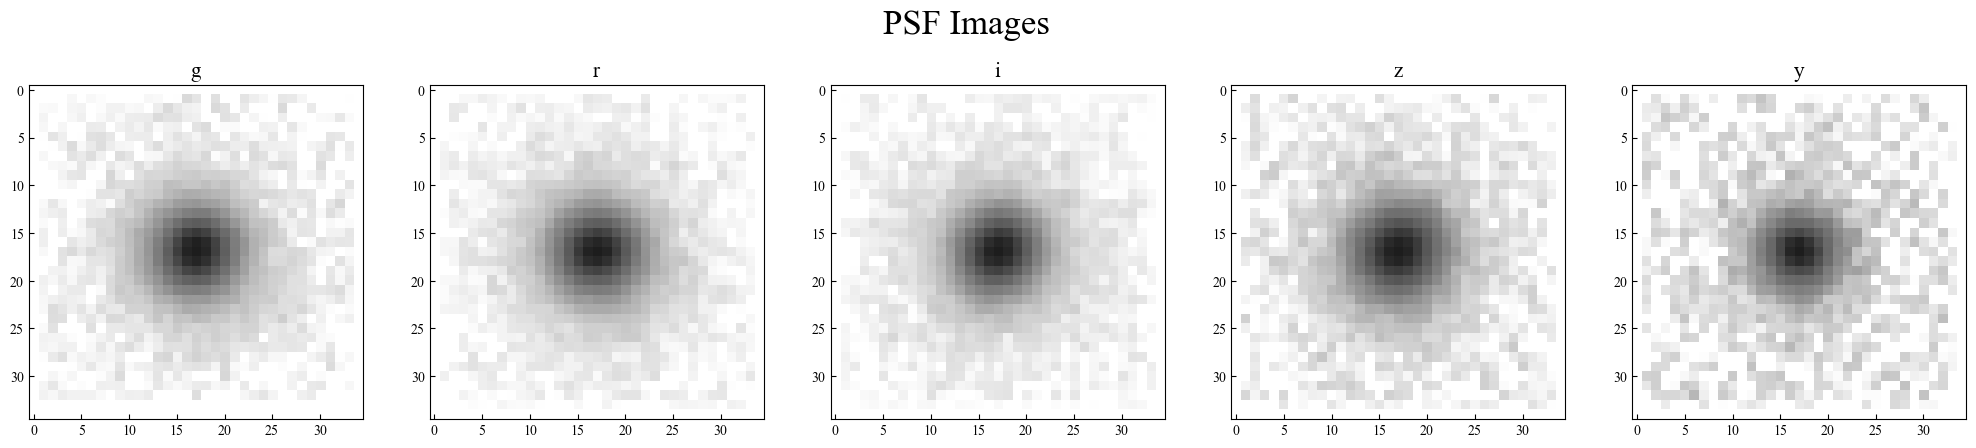

In [104]:
hdul_input_psf_g = fits.open(Path.cwd() / 'late_g_psf.fits')
hdul_input_psf_r = fits.open(Path.cwd() / 'late_r_psf.fits')
hdul_input_psf_i = fits.open(Path.cwd() / 'late_i_psf.fits')
hdul_input_psf_z = fits.open(Path.cwd() / 'late_z_psf.fits')
hdul_input_psf_y = fits.open(Path.cwd() / 'late_y_psf.fits')

print("-"*10 + " PSF图像的header里几个参数需要关注 " + "-"*10)
print("g band --> SOFTNAME: {} | EXPTIME: {} | GAIN: {}".format(
    hdul_input_psf_g[0].header['SOFTNAME'], 
    hdul_input_psf_g[0].header['EXPTIME'], 
    hdul_input_psf_g[0].header['GAIN'])
    )
print("r band --> SOFTNAME: {} | EXPTIME: {} | GAIN: {}".format(
    hdul_input_psf_r[0].header['SOFTNAME'], 
    hdul_input_psf_r[0].header['EXPTIME'], 
    hdul_input_psf_r[0].header['GAIN'])
    )
print("i band --> SOFTNAME: {} | EXPTIME: {} | GAIN: {}".format(
    hdul_input_psf_i[0].header['SOFTNAME'], 
    hdul_input_psf_i[0].header['EXPTIME'], 
    hdul_input_psf_i[0].header['GAIN'])
    )
print("z band --> SOFTNAME: {} | EXPTIME: {} | GAIN: {}".format(
    hdul_input_psf_z[0].header['SOFTNAME'], 
    hdul_input_psf_z[0].header['EXPTIME'], 
    hdul_input_psf_z[0].header['GAIN'])
    )
print("y band --> SOFTNAME: {} | EXPTIME: {} | GAIN: {}".format(
    hdul_input_psf_y[0].header['SOFTNAME'], 
    hdul_input_psf_y[0].header['EXPTIME'], 
    hdul_input_psf_y[0].header['GAIN'])
    )

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
norm_g = simple_norm([0, 2 * np.max(hdul_input_psf_g[0].data)], 'log', percent=100)
norm_r = simple_norm([0, 2 * np.max(hdul_input_psf_r[0].data)], 'log', percent=100)
norm_i = simple_norm([0, 2 * np.max(hdul_input_psf_i[0].data)], 'log', percent=100)
norm_z = simple_norm([0, 2 * np.max(hdul_input_psf_z[0].data)], 'log', percent=100)
norm_y = simple_norm([0, 2 * np.max(hdul_input_psf_y[0].data)], 'log', percent=100)

ax_g = ax[0].imshow(hdul_input_psf_g[0].data, norm=norm_g, cmap='Greys')
ax_r = ax[1].imshow(hdul_input_psf_r[0].data, norm=norm_r, cmap='Greys')
ax_i = ax[2].imshow(hdul_input_psf_i[0].data, norm=norm_i, cmap='Greys')
ax_z = ax[3].imshow(hdul_input_psf_z[0].data, norm=norm_z, cmap='Greys')
ax_y = ax[4].imshow(hdul_input_psf_y[0].data, norm=norm_y, cmap='Greys')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("PSF Images", fontsize=25);

## Mask图像  
* 5个波段的图像使用同一个Mask
* mask图像的像素值是0/1；有效像素标记为0，无效像素标记为1
* 该示例的mask只标记了一个坏像素(160, 0)

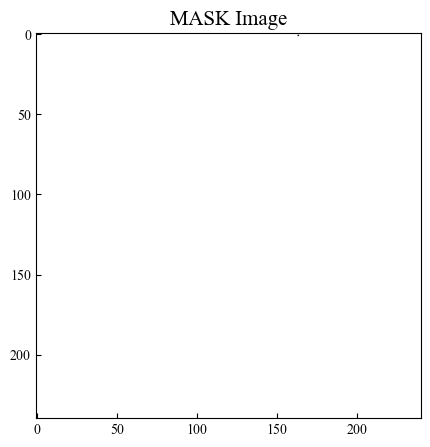

In [105]:
hdul_input_mask = fits.open(Path.cwd() / 'late_mask.fits')

fig, ax = plt.subplots(figsize=(5, 5))
mask = ax.imshow(hdul_input_mask[0].data, cmap='Greys')
ax.set_title("MASK Image", fontsize=15);

# 使用ds9检查mask图像的像素
# !open late_mask.fits  

## sigma图像（误差图像）

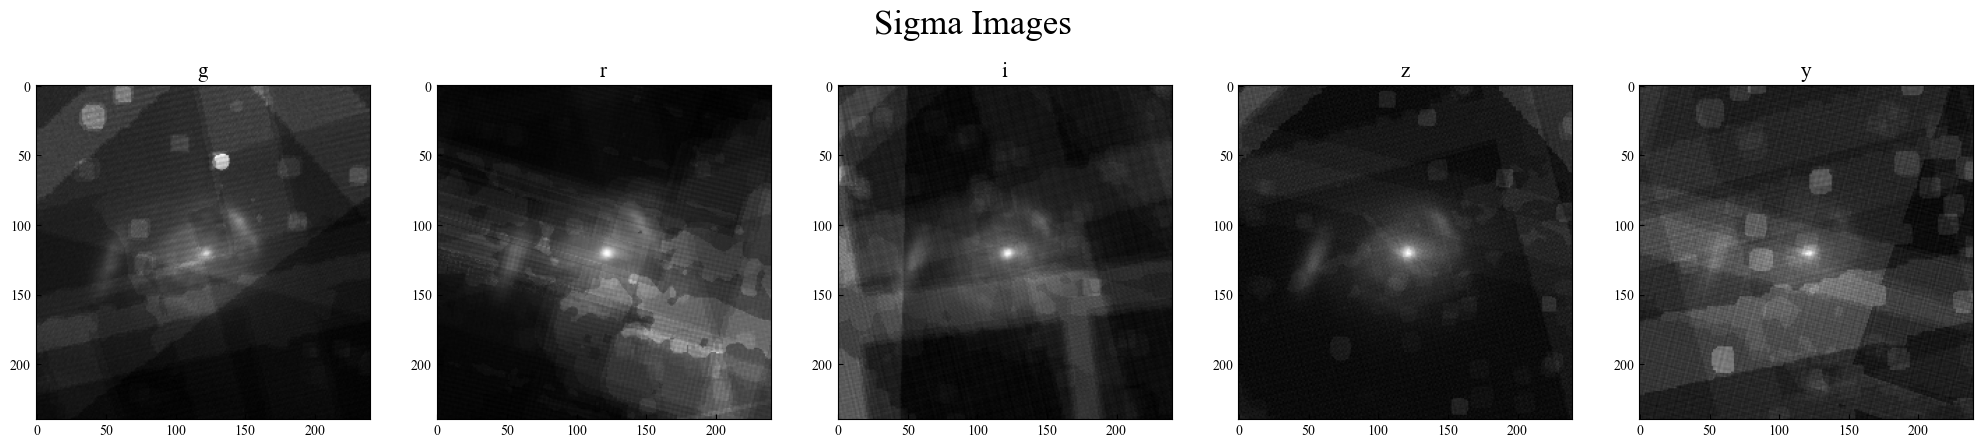

In [106]:
hdul_input_weight_g = fits.open(Path.cwd() / 'late_g_weight.fits')
hdul_input_weight_r = fits.open(Path.cwd() / 'late_r_weight.fits')
hdul_input_weight_i = fits.open(Path.cwd() / 'late_i_weight.fits')
hdul_input_weight_z = fits.open(Path.cwd() / 'late_z_weight.fits')
hdul_input_weight_y = fits.open(Path.cwd() / 'late_y_weight.fits')

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))

ax_g = ax[0].imshow(hdul_input_weight_g[0].data, cmap='gray')
ax_r = ax[1].imshow(hdul_input_weight_r[0].data, cmap='gray')
ax_i = ax[2].imshow(hdul_input_weight_i[0].data, cmap='gray')
ax_z = ax[3].imshow(hdul_input_weight_z[0].data, cmap='gray')
ax_y = ax[4].imshow(hdul_input_weight_y[0].data, cmap='gray')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("Sigma Images", fontsize=25);

# !open late_g_weight.fits

## 输入文件1:`.feedme`配置文件
* 官方的feedme文件的说明, 见-->`official_input_file_example/EXAMPLE.GALFITM.INPUT.txt`
* feedme文件为配置文件，里面包含`图像与GALFIT控制参数（字母开头的行）`和`初始拟合参数（数字开头的行）`两类(#开头的行为注释)
* 一个参数行有多个输入值时，用逗号分隔，之间不能有空格

> Question:  
    1. A2参数, 波段中值对拟合结果的影响?  
    2. C参数, Sigma Image自动生成或提供, 差别多大?  
    3. PSF fine sampling factor的作用, 如何取值?  

In [107]:
%cat late_config.feedme

8465.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


# IMAGE and GALFIT CONTROL PARAMETERS
A) late_g_data.fits,late_r_data.fits,late_i_data.fits,late_z_data.fits,late_y_data.fits             # 输入图像，顺序必须按波长增加(或减小)的顺序
A1) g,r,i,z,y                       # Band labels (不区分大小写, 如果拟合单个波段, 可以省略不写)
A2) 4866,6215,7545,8679,9633        # Band wavelengths (取波段范围的中值, 单位一致即可, 推荐全用angstrom)
B) late_results.fits                # Output data image block (输出文件名)
C) late_g_weight.fits,late_r_weight.fits,late_i_weight.fits,late_z_weight.fits,late_y_weight.fits   # Sigma image name (made from weight if blank or "none") (有名写名, 没有写none, galgit会自动根据图像生成, 只写一个none, 所有图像都设置为none)
D) late_g_psf.fits,late_r_psf.fits,late_i_psf.fits,late_z_psf.fits,late_y_psf.fits                  # Input PSF image
E) 1                                # PSF fine sampling factor relative to data (PSF精细采样因子)
F) late_mask.fits,late_mask.fits,late_mask.fits,late_mask.fits,late_mask.fits                       # Bad pixel mask (FITS image or ASCII coord list) (不提供, 则写none; 只写一个none, 所有图像

## 输入文件2: `.CONSTRAINTS`限制文件  
* [官网限制文件示例](https://www.nottingham.ac.uk/astronomy/megamorph/exec/EXAMPLE.GALFITM.CONSTRAINTS)
* 一共有3列, 第1列:模型组件的`序号与绑定类型`, 第2列:限制参数的名称, 第3列:说明
* 参数绑定类型:
    1. `Soft single-component constraints` (Soft单成分限制), 将第n个模型的xx参数限制在一个范围内进行拟合
    2. `Soft coupled-components constraints` (Soft绑定限制), 例如: `2-3 mag -1 to 2`, 表示限制第3个模型的星等与第2个模型的星等的差在-1-2之间
    3. `Hard coupled-components constraints` (硬绑定限制), 例如: `2_3 x offset`, 表示模型2和3的x参数在拟合的过程中保持初始值的`差值`; `2_3 x ratio`, 表示模型2和3的x参数在拟合的过程中保持初始值的`比值`

In [108]:
%cat galfitm_SS.CONSTRAINTS

8471.27s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


# Component/    parameter   constraint	Comment
# operation	(see below)   range

    3              n        0.3 to 8    # Soft constraint: Constrains the
					# sersic index n to within
				        # ABSOLUTE values from 0.3 to 8.

    3              re        0.5 to 500    # Soft constraint: Constrains the
					# effective radius re to within
				        # ABSOLUTE values from 0.5 to 500

    3              q         0.1 to 1.   # Soft constraint: Constrains the
					# axis ratio q to within
				        # ABSOLUTE values from 0.1 to 1

    3              pa         -179.99 to 180 # Soft constraint: Constrains the
					# position angle pa to within
				        # ABSOLUTE values from -179.99 to 180

    2	  	   x	     -1  1	# Soft constraint: Constrains
					# x-position of component
					# 2 to within +1 and -1 of the
					# INPUT value.
    2	  	   y	     -1  1	# Soft constraint: Constrains
					# x-position of component
					# 2 to within +1 and -1 of the
					# INPUT value.

    2		

# 输出文件  
* galfitm的输出文件一共有4个:
    1. `FITS Cube`, 配置文件中命名的fits文件, 包含全部图像信息
    2. `<result>.galfit.01` Restart file, 跟配置文件相同格式的拟合结果
    3. `<result>.galfit.01.band` 跟配置文件相同格式的拟合结果
    4. `fit.log`

## `FITS Cube`  
* model image的header里前面放置着该波段的拟合信息，后边放着汇总的各个波段的拟合结果（每个model的header里都有这个汇总结果）
* 从FITS文件的`FINAL_BAND`层来读取最终的拟合数据更方便

In [109]:
hdul = fits.open(Path.cwd() / 'late_results.fits')
hdul.info()  # ^ 在配置文件中, 已经设置了: W) input,model,residual,component   # 输出选项, 因此看到的FITS Cube是这样的

Filename: /Users/rui/Code/1_Astronote/17_GALFITM/late_type_example/late_results.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  INPUT_g       1 PrimaryHDU      34   (232, 232)   float32   
  1  INPUT_r       1 ImageHDU        35   (232, 232)   float32   
  2  INPUT_i       1 ImageHDU        35   (232, 232)   float32   
  3  INPUT_z       1 ImageHDU        35   (232, 232)   float32   
  4  INPUT_y       1 ImageHDU        35   (232, 232)   float32   
  5  MODEL_g       1 ImageHDU       319   (232, 232)   float32   
  6  MODEL_r       1 ImageHDU       319   (232, 232)   float32   
  7  MODEL_i       1 ImageHDU       319   (232, 232)   float32   
  8  MODEL_z       1 ImageHDU       319   (232, 232)   float32   
  9  MODEL_y       1 ImageHDU       319   (232, 232)   float32   
 10  RESIDUAL_g    1 ImageHDU         9   (232, 232)   float32   
 11  RESIDUAL_r    1 ImageHDU         9   (232, 232)   float32   
 12  RESIDUAL_i    1 ImageHDU         9   (232, 232)   float3

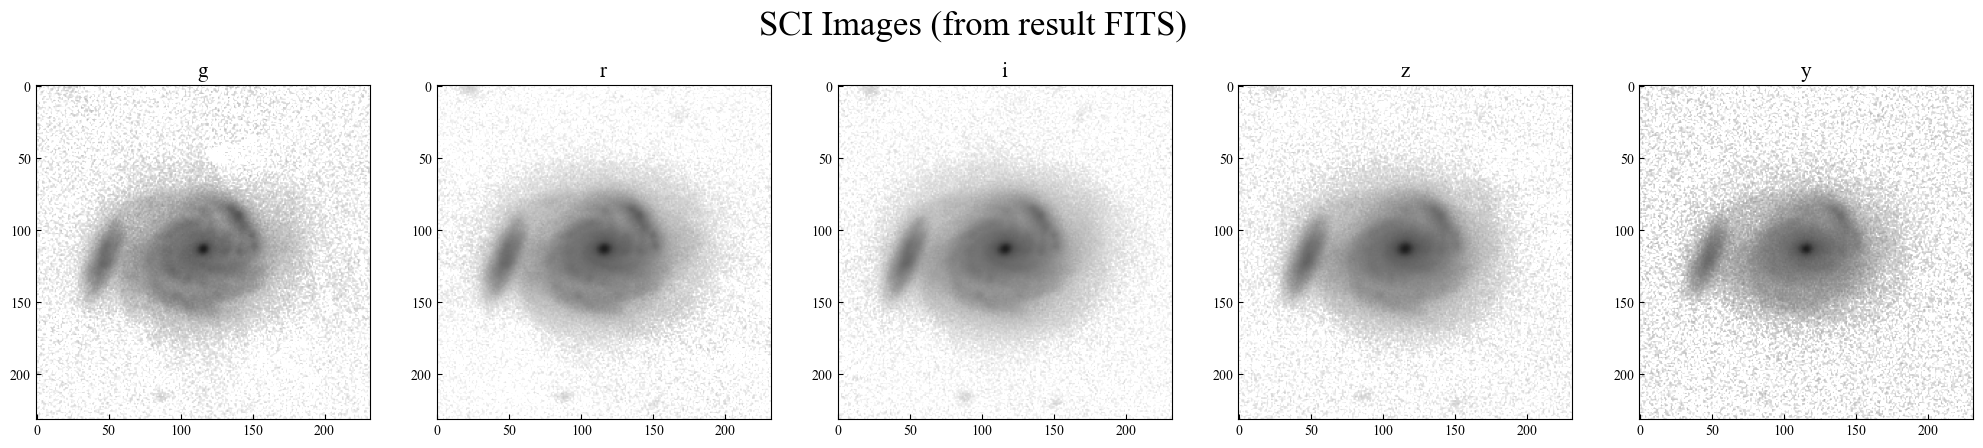

In [110]:
# result文件的扩展层 ==> 输入图像
input_g, input_r, input_i, input_z, input_y = hdul[0], hdul[1], hdul[2], hdul[3], hdul[4]
# * header与输入的星系图像相同, 加上了几个额外的信息
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
norm_g = simple_norm([0, 2 * np.max(input_g.data)], 'log', percent=100)
norm_r = simple_norm([0, 2 * np.max(input_r.data)], 'log', percent=100)
norm_i = simple_norm([0, 2 * np.max(input_i.data)], 'log', percent=100)
norm_z = simple_norm([0, 2 * np.max(input_z.data)], 'log', percent=100)
norm_y = simple_norm([0, 2 * np.max(input_y.data)], 'log', percent=100)

ax_g = ax[0].imshow(input_g.data, norm=norm_g, cmap='Greys')
ax_r = ax[1].imshow(input_r.data, norm=norm_r, cmap='Greys')
ax_i = ax[2].imshow(input_i.data, norm=norm_i, cmap='Greys')
ax_z = ax[3].imshow(input_z.data, norm=norm_z, cmap='Greys')
ax_y = ax[4].imshow(input_y.data, norm=norm_y, cmap='Greys')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("SCI Images (from result FITS)", fontsize=25);

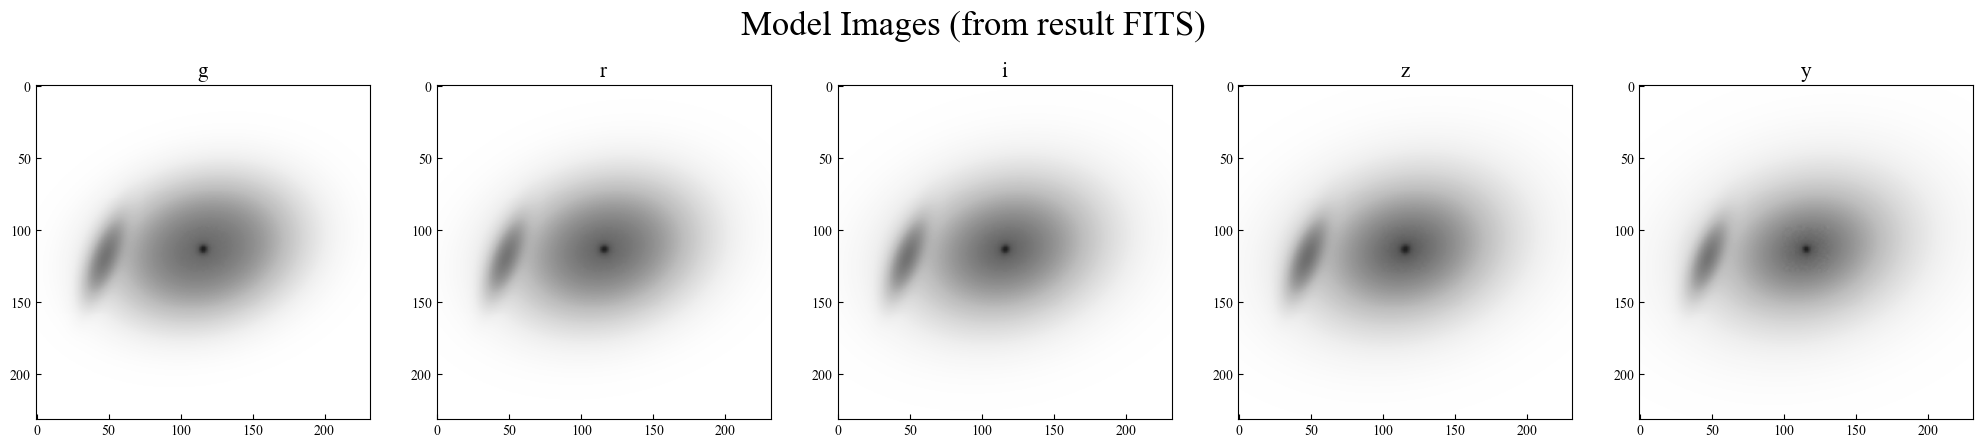

In [111]:
# result文件的扩展层 ==> 模型图像
model_g, model_r, model_i, model_z, model_y = hdul[5], hdul[6], hdul[7], hdul[8], hdul[9]
# * header里包含拟合信息
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
norm_g = simple_norm([0, 2 * np.max(model_g.data)], 'log', percent=100)
norm_r = simple_norm([0, 2 * np.max(model_r.data)], 'log', percent=100)
norm_i = simple_norm([0, 2 * np.max(model_i.data)], 'log', percent=100)
norm_z = simple_norm([0, 2 * np.max(model_z.data)], 'log', percent=100)
norm_y = simple_norm([0, 2 * np.max(model_y.data)], 'log', percent=100)

ax_g = ax[0].imshow(model_g.data, norm=norm_g, cmap='Greys')
ax_r = ax[1].imshow(model_r.data, norm=norm_r, cmap='Greys')
ax_i = ax[2].imshow(model_i.data, norm=norm_i, cmap='Greys')
ax_z = ax[3].imshow(model_z.data, norm=norm_z, cmap='Greys')
ax_y = ax[4].imshow(model_y.data, norm=norm_y, cmap='Greys')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("Model Images (from result FITS)", fontsize=25);


In [112]:
# 示例：计算host to total flux ratio
agn_mag_g = eval(model_g.header['2_MAG_G'].split(' +/- ')[0])
agn_mag_g_err = eval(model_g.header['2_MAG_G'].split(' +/- ')[1])

host_mag_g = eval(model_g.header['3_MAG_G'].split(' +/- ')[0])
host_mag_g_err = eval(model_g.header['3_MAG_G'].split(' +/- ')[1])

def cal_flux(mag, ZP):
    flux = 10**(0.4*(ZP-mag))
    return flux
flux_agn_g = cal_flux(mag=agn_mag_g, ZP=25)
flux_host_g = cal_flux(mag=host_mag_g, ZP=25)

f_host = flux_host_g / (flux_host_g + flux_agn_g)
print(f"host to flux ratio: {f_host:.2f}")

host to flux ratio: 0.96


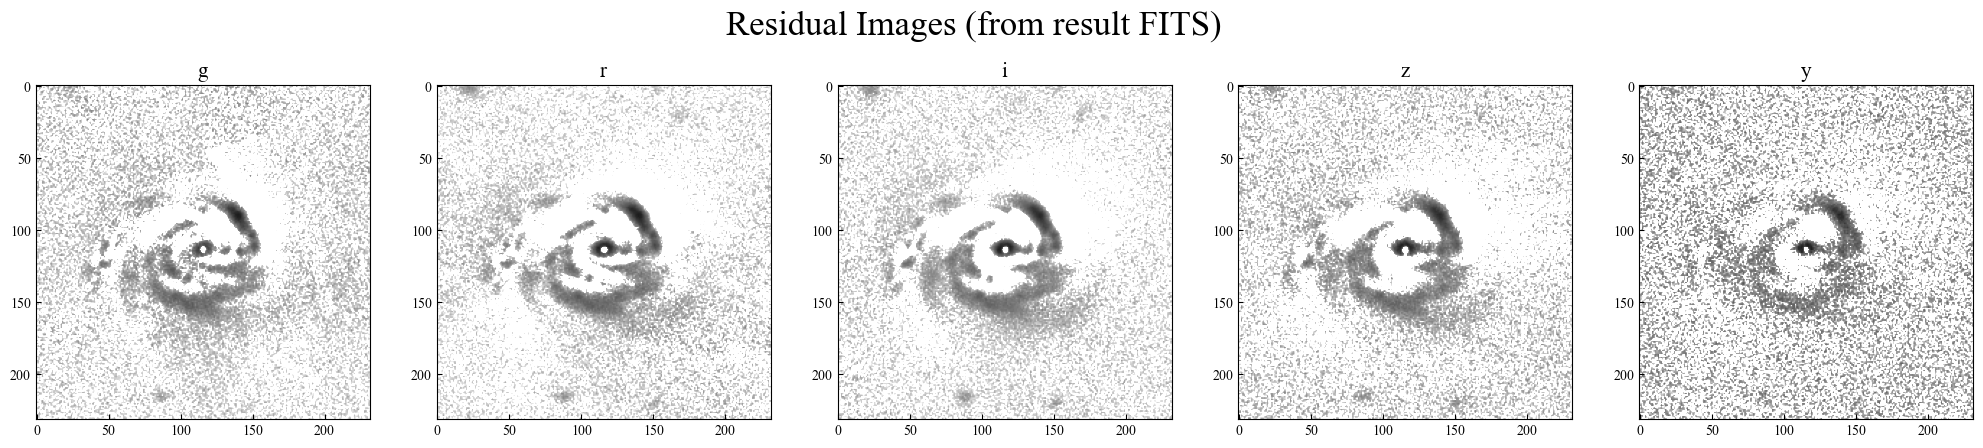

In [113]:
# result文件的扩展层 ==> 残差图像
residual_g, residual_r, residual_i, residual_z, residual_y = hdul[10], hdul[11], hdul[12], hdul[13], hdul[14]
# * header里无重要信息
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
norm_g = simple_norm([0, 2 * np.max(residual_g.data)], 'log', percent=100)
norm_r = simple_norm([0, 2 * np.max(residual_r.data)], 'log', percent=100)
norm_i = simple_norm([0, 2 * np.max(residual_i.data)], 'log', percent=100)
norm_z = simple_norm([0, 2 * np.max(residual_z.data)], 'log', percent=100)
norm_y = simple_norm([0, 2 * np.max(residual_y.data)], 'log', percent=100)

ax_g = ax[0].imshow(residual_g.data, norm=norm_g, cmap='Greys')
ax_r = ax[1].imshow(residual_r.data, norm=norm_r, cmap='Greys')
ax_i = ax[2].imshow(residual_i.data, norm=norm_i, cmap='Greys')
ax_z = ax[3].imshow(residual_z.data, norm=norm_z, cmap='Greys')
ax_y = ax[4].imshow(residual_y.data, norm=norm_y, cmap='Greys')

ax[0].set_title("g", fontsize=15);
ax[1].set_title("r", fontsize=15);
ax[2].set_title("i", fontsize=15);
ax[3].set_title("z", fontsize=15);
ax[4].set_title("y", fontsize=15);
fig.suptitle("Residual Images (from result FITS)", fontsize=25);

Text(5, 25, 'sersic2')

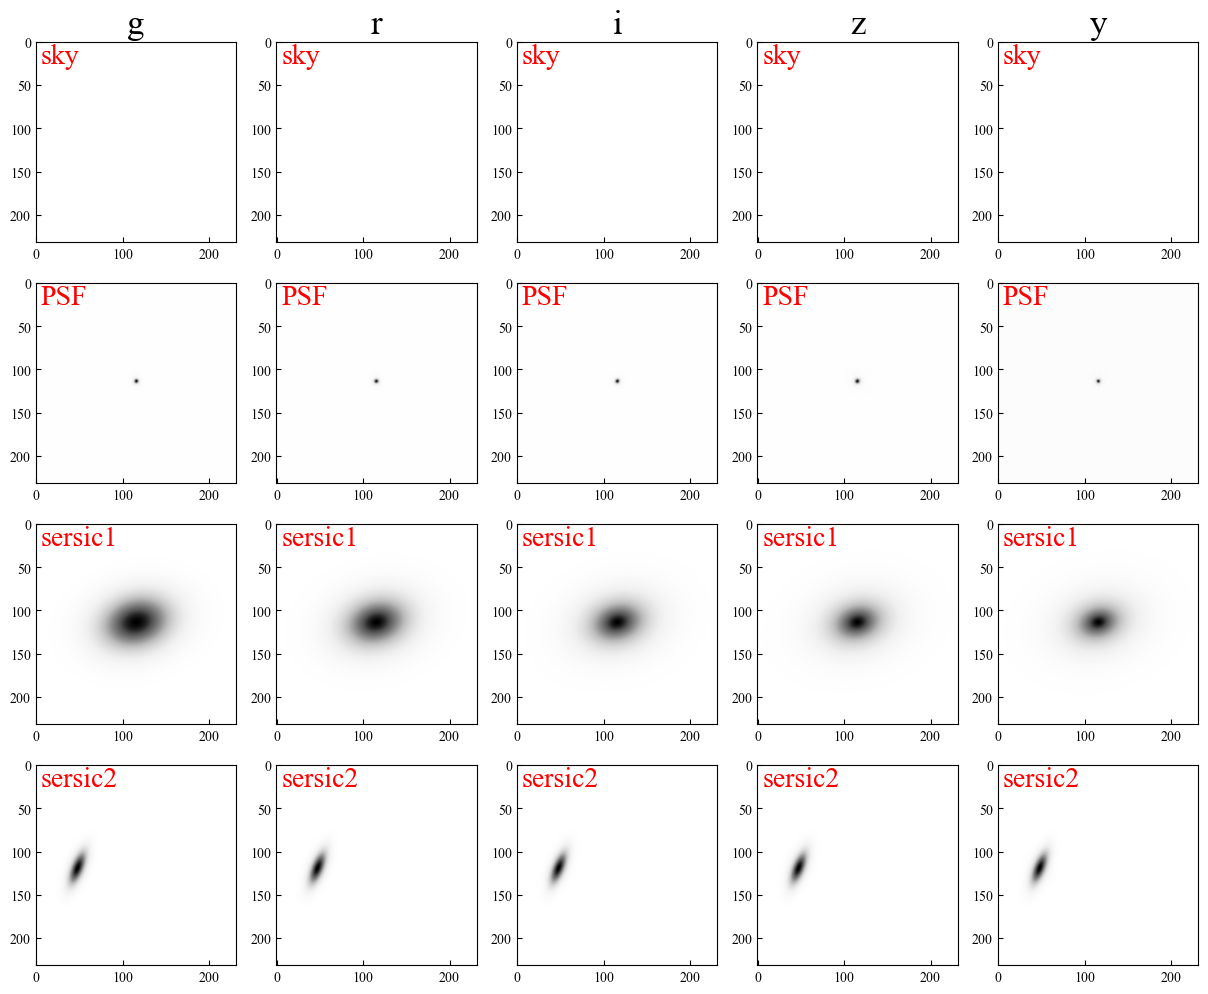

In [124]:
component_sky_g, component_sky_r, component_sky_i, component_sky_z, component_sky_y = hdul[15], hdul[19], hdul[23], hdul[27], hdul[31]
component_psf_g, component_psf_r, component_psf_i, component_psf_z, component_psf_y = hdul[16], hdul[20], hdul[24], hdul[28], hdul[32]
component_sersic1_g, component_sersic1_r, component_sersic1_i, component_sersic1_z, component_sersic1_y = hdul[17], hdul[21], hdul[25], hdul[29], hdul[33]
component_sersic2_g, component_sersic2_r, component_sersic2_i, component_sersic2_z, component_sersic2_y = hdul[18], hdul[22], hdul[26], hdul[30], hdul[34]

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(15, 12))
ax = ax.ravel()
text_x = 5
text_y = 25

# 第一行显示sky model, 因为都设置为0, 因此是空白的
ax[0].imshow(component_sky_g.data, cmap='Greys')
ax[0].text(text_x, text_y, "sky", color ='red', fontsize=20)
ax[0].set_title("g", fontsize=25)

ax[1].imshow(component_sky_r.data, cmap='Greys')
ax[1].text(text_x, text_y, "sky", color ='red', fontsize=20)
ax[1].set_title("r", fontsize=25)


ax[2].imshow(component_sky_i.data, cmap='Greys')
ax[2].text(text_x, text_y, "sky", color ='red', fontsize=20)
ax[2].set_title("i", fontsize=25)


ax[3].imshow(component_sky_z.data, cmap='Greys')
ax[3].text(text_x, text_y, "sky", color ='red', fontsize=20)
ax[3].set_title("z", fontsize=25)


ax[4].imshow(component_sky_y.data, cmap='Greys')
ax[4].text(text_x, text_y, "sky", color ='red', fontsize=20)
ax[4].set_title("y", fontsize=25)


# 第2行显示psf model
ax[5].imshow(component_psf_g.data, cmap='Greys')
ax[5].text(text_x, text_y, "PSF", color ='red', fontsize=20)

ax[6].imshow(component_psf_r.data, cmap='Greys')
ax[6].text(text_x, text_y, "PSF", color ='red', fontsize=20)

ax[7].imshow(component_psf_i.data, cmap='Greys')
ax[7].text(text_x, text_y, "PSF", color ='red', fontsize=20)

ax[8].imshow(component_psf_z.data, cmap='Greys')
ax[8].text(text_x, text_y, "PSF", color ='red', fontsize=20)

ax[9].imshow(component_psf_y.data, cmap='Greys')
ax[9].text(text_x, text_y, "PSF", color ='red', fontsize=20)

# 第3行显示sersic 1 (主目标星系的sersic模型)
ax[10].imshow(component_sersic1_g.data, cmap='Greys')
ax[10].text(text_x, text_y, "sersic1", color ='red', fontsize=20)

ax[11].imshow(component_sersic1_r.data, cmap='Greys')
ax[11].text(text_x, text_y, "sersic1", color ='red', fontsize=20)

ax[12].imshow(component_sersic1_i.data, cmap='Greys')
ax[12].text(text_x, text_y, "sersic1", color ='red', fontsize=20)

ax[13].imshow(component_sersic1_z.data, cmap='Greys')
ax[13].text(text_x, text_y, "sersic1", color ='red', fontsize=20)

ax[14].imshow(component_sersic1_y.data, cmap='Greys')
ax[14].text(text_x, text_y, "sersic1", color ='red', fontsize=20)


# 第4行显示sersic 2 (旁边的近临星系的sersic模型)
ax[15].imshow(component_sersic2_g.data, cmap='Greys')
ax[15].text(text_x, text_y, "sersic2", color ='red', fontsize=20)

ax[16].imshow(component_sersic2_r.data, cmap='Greys')
ax[16].text(text_x, text_y, "sersic2", color ='red', fontsize=20)

ax[17].imshow(component_sersic2_i.data, cmap='Greys')
ax[17].text(text_x, text_y, "sersic2", color ='red', fontsize=20)

ax[18].imshow(component_sersic2_z.data, cmap='Greys')
ax[18].text(text_x, text_y, "sersic2", color ='red', fontsize=20)

ax[19].imshow(component_sersic2_y.data, cmap='Greys')
ax[19].text(text_x, text_y, "sersic2", color ='red', fontsize=20)

In [115]:
from astropy.table import Table

Table(hdul['FIT_INFO'].data)

<Table length=1>
             VERSION              ...
              str33               ...
--------------------------------- ...
galfitm-1.4.4                     ...

In [116]:
Table(hdul['FINAL_BAND'].data)

<Table length=5>
       BAND       COMP1_XC COMP1_XC_ERR ...  COMP4_PA COMP4_PA_ERR COMP4_PA_FIT
      str17       float32    float32    ...  float32    float32       int32    
----------------- -------- ------------ ... --------- ------------ ------------
g                    122.5          0.0 ... 21.463947   0.07376918            1
r                    122.5          0.0 ... 21.463947   0.07376918            1
i                    122.5          0.0 ... 21.463947   0.07376918            1
z                    122.5          0.0 ... 21.463947   0.07376918            1
y                    122.5          0.0 ... 21.463947   0.07376918            1

In [117]:
Table(hdul['FINAL_CHEB'].data)

<Table length=5>
CHEB_ORDER COMP1_XC COMP1_XC_ERR ...  COMP4_PA COMP4_PA_ERR COMP4_PA_FIT
  int32    float32    float32    ...  float32    float32       int32    
---------- -------- ------------ ... --------- ------------ ------------
         0    122.5          0.0 ... 21.463947   0.03688459            1
         1      0.0          0.0 ...       0.0          0.0            0
         2      0.0          0.0 ...       0.0          0.0            0
         3      0.0          0.0 ...       0.0          0.0            0
         4      0.0          0.0 ...       0.0          0.0            0

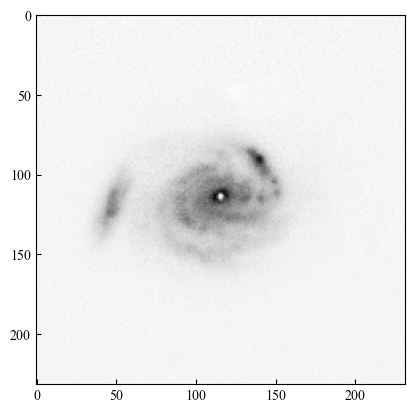

In [118]:
plt.imshow(input_g.data - component_psf_g.data, cmap='Greys')